In [ ]:
!nvidia-smi

Mon Oct 14 09:08:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.0/871.0 kB 15.8 MB/s eta 0:00:00


In [ ]:
import requests
import zipfile
import os

In [ ]:
dataset_url = 'https://universe.roboflow.com/ds/f2PQepn6Bt?key=zOJui6VgFH'

In [ ]:
# Download  dataset
response = requests.get(dataset_url)
dataset_path = 'cows_movement_and_behaviours.zip'

# Write to a zip file
with open(dataset_path, 'wb') as f:
    f.write(response.content)

# Unzipt
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('cows_movement_and_behaviours')

# Remove the zip file after extraction
os.remove(dataset_path)

print("Dataset downloaded and extracted successfully.")

Dataset downloaded and extracted successfully.


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # Load a pretrained YOLOv8 model (nano version)

# Train the model
model.train(data='/content/cows_movement_and_behaviours/data.yaml', epochs=25, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 122MB/s]


Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/cows_movement_and_behaviours/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 22.6MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


AMP: checks passed ✅


train: Scanning /content/cows_movement_and_behaviours/train/labels... 9240 images, 2 backgrounds, 0 corrupt: 100%|██████████| 9240/9240 [00:05<00:00, 1803.45it/s]


train: New cache created: /content/cows_movement_and_behaviours/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/cows_movement_and_behaviours/valid/labels... 388 images, 0 backgrounds, 0 corrupt: 100%|██████████| 388/388 [00:00<00:00, 1032.49it/s]

val: New cache created: /content/cows_movement_and_behaviours/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.35G     0.9336      1.774      1.324         25        640: 100%|██████████| 578/578 [03:10<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.63it/s]


                   all        388        489      0.663       0.64      0.689       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.29G     0.9192      1.091      1.305         20        640: 100%|██████████| 578/578 [03:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]

                   all        388        489      0.638      0.586      0.647      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       2.3G     0.9149     0.9619      1.299         19        640: 100%|██████████| 578/578 [02:58<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.37it/s]

                   all        388        489      0.699      0.716      0.765      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.28G     0.8766     0.8767      1.269         20        640: 100%|██████████| 578/578 [03:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]

                   all        388        489      0.795      0.655      0.758      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.29G     0.8437     0.8093      1.249         28        640: 100%|██████████| 578/578 [02:58<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.81it/s]

                   all        388        489      0.788      0.714        0.8      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.29G     0.8112     0.7706      1.223         24        640: 100%|██████████| 578/578 [03:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]

                   all        388        489      0.804      0.797      0.883      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.28G     0.7902      0.734      1.212         24        640: 100%|██████████| 578/578 [03:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.15it/s]

                   all        388        489      0.861      0.785      0.847      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.32G     0.7777      0.696      1.197         29        640: 100%|██████████| 578/578 [03:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]

                   all        388        489      0.825      0.771       0.87      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.28G     0.7587     0.6736      1.189         21        640: 100%|██████████| 578/578 [03:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]

                   all        388        489      0.855      0.828      0.884      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.27G     0.7427      0.653      1.175         21        640: 100%|██████████| 578/578 [03:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.43it/s]

                   all        388        489      0.808      0.814      0.858      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.28G      0.741      0.646      1.173         27        640: 100%|██████████| 578/578 [03:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        388        489      0.867      0.853      0.892      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.29G     0.7197     0.6184      1.162         32        640: 100%|██████████| 578/578 [03:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.93it/s]

                   all        388        489      0.835      0.852      0.897      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       2.3G     0.7144     0.6054      1.161         31        640: 100%|██████████| 578/578 [03:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.45it/s]

                   all        388        489      0.865      0.852      0.898       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.28G     0.6911     0.5894      1.142         11        640: 100%|██████████| 578/578 [02:56<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.18it/s]

                   all        388        489      0.887       0.83      0.894      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.28G      0.692     0.5773      1.143         24        640: 100%|██████████| 578/578 [02:59<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.41it/s]

                   all        388        489      0.865      0.845      0.899      0.741


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.29G     0.5454     0.4064      1.067         14        640: 100%|██████████| 578/578 [02:55<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.33it/s]

                   all        388        489      0.853      0.844      0.891       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.29G     0.5231     0.3837       1.05         11        640: 100%|██████████| 578/578 [02:49<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        388        489      0.837      0.905      0.902      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.28G     0.5115     0.3619      1.039         13        640: 100%|██████████| 578/578 [02:55<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]

                   all        388        489      0.805      0.889      0.895      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.28G     0.4988     0.3517      1.026         10        640: 100%|██████████| 578/578 [02:49<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.31it/s]

                   all        388        489      0.864      0.884      0.912      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.28G     0.4853     0.3385      1.019         12        640: 100%|██████████| 578/578 [02:51<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.60it/s]

                   all        388        489      0.868      0.872      0.899      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.28G     0.4749     0.3266       1.01         10        640: 100%|██████████| 578/578 [02:54<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]

                   all        388        489      0.873       0.87      0.909      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.28G     0.4613     0.3146      1.003         22        640: 100%|██████████| 578/578 [02:50<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        388        489      0.864      0.868      0.906      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       2.3G     0.4489      0.301     0.9943         13        640: 100%|██████████| 578/578 [02:50<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.33it/s]

                   all        388        489      0.862      0.903      0.912      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.28G     0.4406     0.2915      0.987          8        640: 100%|██████████| 578/578 [02:51<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        388        489      0.877      0.874      0.914      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.28G     0.4322     0.2854     0.9809         10        640: 100%|██████████| 578/578 [02:52<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]

                   all        388        489      0.889      0.856       0.91      0.779



25 epochs completed in 1.269 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,953 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]


                   all        388        489      0.877      0.874      0.914      0.783
                eating         64         75      0.722       0.76      0.796      0.661
                 lying         91         95      0.957      0.958      0.969      0.853
              standing        267        319      0.954      0.905      0.977      0.835
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79def9580370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
import os

for root, dirs, files in os.walk('/content/runs'):
    for file in files:
        if file.endswith(".pt"):
            print(os.path.join(root, file))

/content/runs/detect/train/weights/last.pt
/content/runs/detect/train/weights/best.pt


In [ ]:
#validation
from ultralytics import YOLO

# Load the model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Run validation on the dataset
results = model.val(data='/content/cows_movement_and_behaviours/data.yaml')


print(results)


Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,953 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/cows_movement_and_behaviours/valid/labels.cache... 388 images, 0 backgrounds, 0 corrupt: 100%|██████████| 388/388 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


                   all        388        489      0.877      0.874      0.914      0.784
                eating         64         75      0.722       0.76      0.796      0.662
                 lying         91         95      0.957      0.958      0.969      0.853
              standing        267        319      0.952      0.903      0.977      0.835
Speed: 0.4ms preprocess, 5.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79dfce74e7d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.

In [ ]:
# Run predictions on an image file
results = model.predict(source='/content/cow_test_1.jpg', show=True)

# Print the results
print(results)




WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/cow_test_1.jpg: 416x640 4 eatings, 1 standing, 37.0ms
Speed: 3.0ms preprocess, 37.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'eating', 1: 'lying', 2: 'standing'}
obb: None
orig_img: array([[[190, 103,  36],
        [190, 103,  36],
        [190, 103,  36],
        ...,
        [208, 130,  64],
        [208, 130,  64],
        [207, 129,  63]],

       [[190, 103,  36],
        [190, 103,  36],
        [190, 103,  36],
        ...,
        [208, 130,  64],
        [208, 130,  64],
        [207, 129,  63]],

       [[190, 103,  36],
        [190, 103,  36],
        [190, 103,  36],
        ...,
        [209, 131,  65],
        [208, 130,  64],
        [208, 130,  64]],

       ...,

       [[ 60, 178, 137],
        [ 52, 176,


image 1/1 /content/cow_test_1.jpg: 416x640 4 eatings, 1 standing, 6.9ms
Speed: 1.8ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


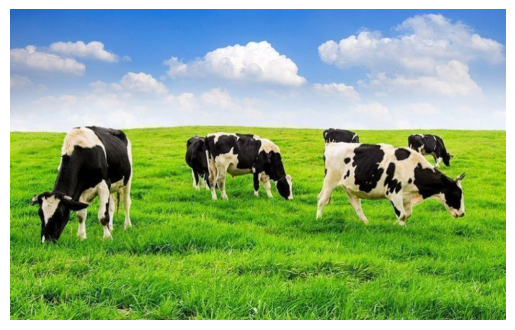

In [ ]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Run predictions on an image
results = model.predict(source='/content/cow_test_1.jpg', save=True)

# Load and display the saved image with predictions
predicted_image_path = results[0].path  # This is the path where the result is saved

img = cv2.imread(predicted_image_path)


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.axis('off')
plt.show()



image 1/1 /content/cows_test.jpg: 384x640 5 lyings, 25 standings, 60.0ms
Speed: 8.4ms preprocess, 60.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3


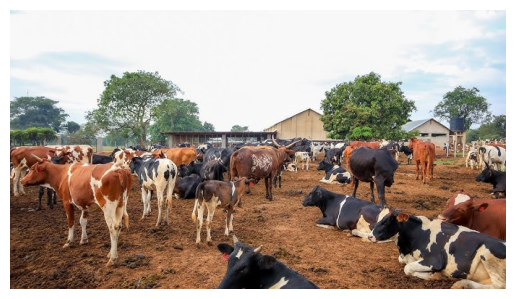

In [ ]:

results = model.predict(source='/content/cows_test.jpg', save=True, conf=0.25)


annotated_image_path = results[0].path

annotated_image = Image.open(annotated_image_path)


plt.imshow(annotated_image)
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files


model_path = '/content/runs/detect/train/weights/best.pt'

files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>